## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
'''
Your code here (optional)
確認硬體資源

Windows 在 C:\\Program Files\\NVIDIA Corporation\\NVSMI 加入系統環境變量.
在cmd下執行:
nvidia-smi.exe -h
nvidia-smi.exe -l 1
'''

!C:\"Program Files"\"NVIDIA Corporation"\NVSMI\nvidia-smi.exe

Sat Jul 13 19:03:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 416.34       Driver Version: 416.34       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   38C    P8    16W / 215W |    729MiB /  8192MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理: 將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間
def preproc_x(x, flatten=True):
    maxi = x.max()
    mini = x.min()
    if (maxi - mini) == 0 :
        x = (x - mini) / 0.1
    else:
        x = (x - mini) / (maxi - mini)
    
    if flatten:
        x = x.reshape((len(x), -1))
    
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""
定義神經網路,由num_neurons可看出隱藏層有8層
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32, 16, 8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0713 19:04:07.013264 17808 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 19:04:07.025232 17808 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 19:04:07.028224 17808 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 19:04:11.902477 17808 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 19:04:11.907489 17808 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 19:04:14.351384 17808 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 19:04:14.442396 17808 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 248us/step - loss: 2.3047 - acc: 0.1030 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 12s 246us/step - loss: 2.3027 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 13s 258us/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 13s 266us/step - loss: 2.3027 - acc: 0.0959 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 13s 264us/step - loss: 2.3027 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 13s 264us/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 13s 259us/step - loss: 2.3027 - acc: 0.0964 - val_l

Epoch 59/100
50000/50000 [==============================] - 11s 225us/step - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 11s 224us/step - loss: 2.3027 - acc: 0.0960 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 11s 226us/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 11s 226us/step - loss: 2.3027 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 11s 224us/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 11s 225us/step - loss: 2.3027 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 11s 225us/step - loss: 2.3027 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 66/100


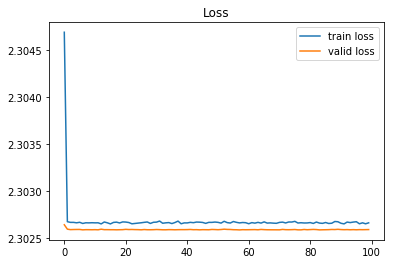

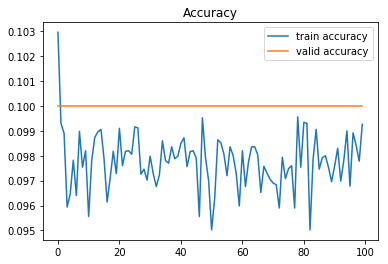

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()